### Importing the Libraries

In [159]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Function for Erosion

In [160]:
def apply_erosion_operation(image, structuring_element):
    eroded_image = []
    image //= 255
    offset = structuring_element.shape[1] // 2
    height, width = image.shape

    for r in range(height):
        nth_row = []
        for c in range(width):
            fit = True
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        if (structuring_element[x, y] == 1 and image[r + x, c + y] != structuring_element[x, y]):
                            fit = False
            pixel = 1 if fit else 0
            nth_row.append(pixel)
        eroded_image.append(nth_row)

    return np.uint8(eroded_image) * 255

### Function for Dilation

In [161]:
def apply_dilation_operation(image, structuring_element):
    eroded_image = []
    image //= 255
    offset = structuring_element.shape[1] // 2
    height, width = image.shape

    for r in range(height):
        nth_row = []
        for c in range(width):
            hit = False
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        if (structuring_element[x, y] == 1 and image[r + x, c + y] == structuring_element[x, y]):
                            hit = True
            pixel = 1 if hit else 0
            nth_row.append(pixel)
        eroded_image.append(nth_row)

    return np.uint8(eroded_image) * 255

### Creating Structuring Element for Erosion & Dilation

In [162]:
structuring_element_size = 3
structuring_element = np.ones((structuring_element_size, structuring_element_size))
structuring_element = np.uint8(structuring_element)

### Loading the Original Image

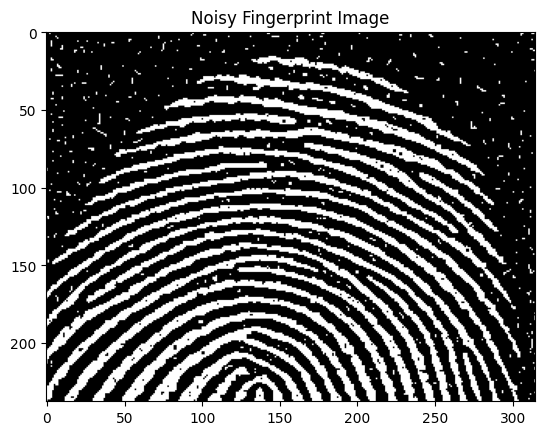

In [163]:
noisy_fingerprint = cv2.imread("./Fig0911(a) Noisy Fingerprint 315x238.tif", 0)
plt.imshow(cv2.cvtColor(noisy_fingerprint, cv2.COLOR_BGR2RGB))
plt.title("Noisy Fingerprint Image")
plt.show()

### Applying Erosion

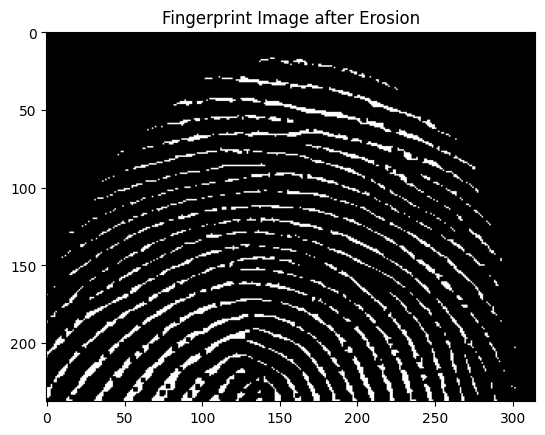

In [164]:
eroded_fingerprint = apply_erosion_operation(noisy_fingerprint, structuring_element)
plt.imshow(cv2.cvtColor(eroded_fingerprint, cv2.COLOR_BGR2RGB))
plt.title("Fingerprint Image after Erosion")
plt.show()

### Applying Erosion

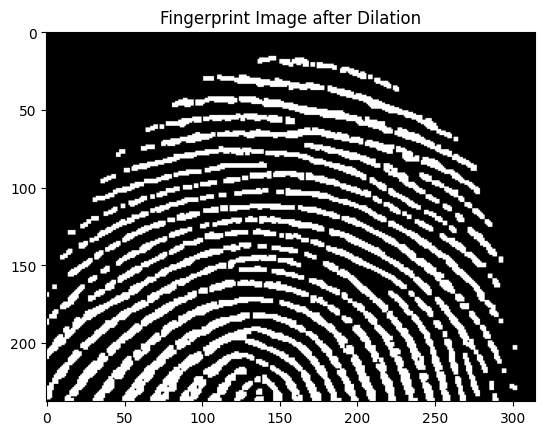

In [165]:
dilated_fingerprint = apply_dilation_operation(eroded_fingerprint, structuring_element)
plt.imshow(cv2.cvtColor(dilated_fingerprint, cv2.COLOR_BGR2RGB))
plt.title("Fingerprint Image after Dilation")
plt.show()